<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/prediction_with_CNN_LOLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np

data=np.load(path+'datalolc.npy')
target=np.load(path+'targetlolc.npy')

In [25]:
print(data.shape)
print(target.shape)
print(data.shape[1:])

(2530, 50, 4)
(2530,)
(50, 4)


In [26]:
train_data=data[:1771]
train_target=target[:1771]

test_data=data[1771:]
test_target=target[1771:]

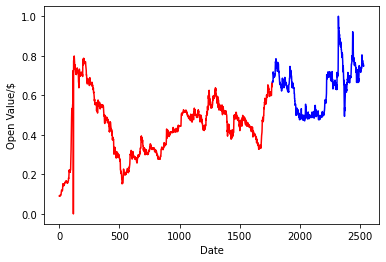

In [27]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1771,2530,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [28]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dense,Dropout,Activation,Flatten

model=Sequential()

model.add(Conv1D(filters=128,kernel_size=3,input_shape=(data.shape[1:])))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

"""model.add(Conv1D(filters=256,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
"""

"""model.add(Conv1D(filters=128,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
"""
"""model.add(Conv1D(filters=64,kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))"""
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam',metrics=['Accuracy','mse', 'mae', 'mape'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 48, 128)           1664      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3073      
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
____________________________________________________

In [29]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0271 - accuracy: 0.0000e+00 - mse: 0.0271 - mae: 0.1173 - mape: 38273.9148 - val_loss: 0.0027 - val_accuracy: 0.0000e+00 - val_mse: 0.0027 - val_mae: 0.0394 - val_mape: 8.0755
Epoch 2/200
50/50 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - mse: 0.0033 - mae: 0.0421 - mape: 58480.6052 - val_loss: 0.0011 - val_accuracy: 0.0000e+00 - val_mse: 0.0011 - val_mae: 0.0256 - val_mape: 5.4433
Epoch 3/200
50/50 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - mse: 0.0026 - mae: 0.0361 - mape: 522162.2982 - val_loss: 6.8512e-04 - val_accuracy: 0.0000e+00 - val_mse: 6.8512e-04 - val_mae: 0.0222 - val_mape: 4.9170
Epoch 4/200
50/50 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - mse: 0.0021 - mae: 0.0346 - mape: 77354.9178 - val_loss: 0.0020 - val_accuracy: 0.0000e+00 - val_mse: 0.0020 - val_mae: 0.0358 - val

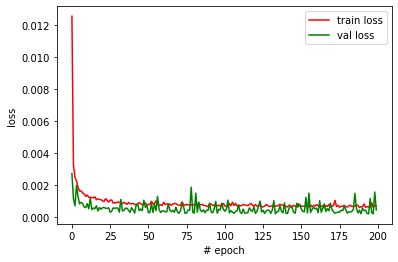

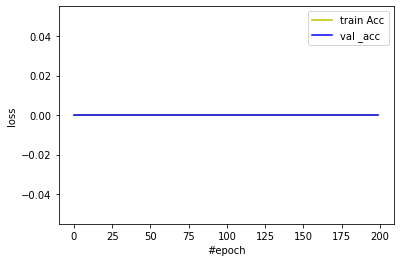

In [30]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],'y',label='train Acc')
plt.plot(history.history['val_accuracy'],'b',label='val _acc')
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9361090112740773


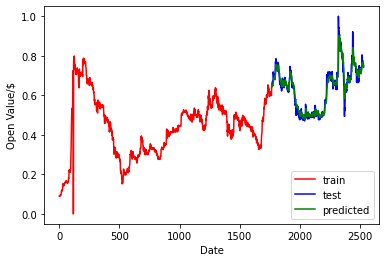

In [32]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1771,2530,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

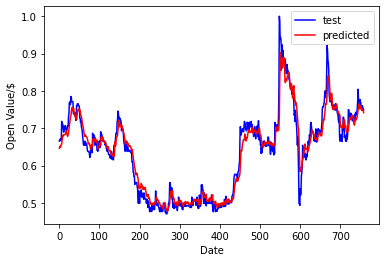

In [33]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()